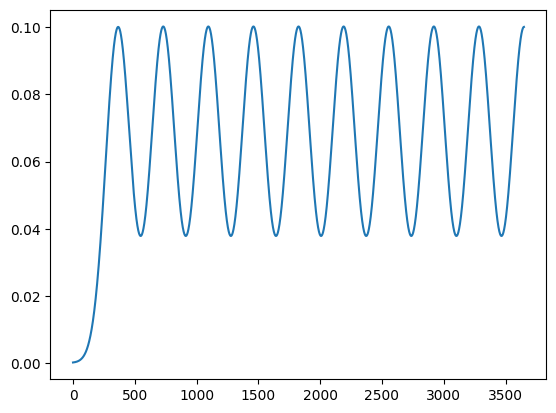

In [34]:
'''Three species model of a food chain'''
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


def fisheries(t):
    max_size = 0.1
    sigma = 10000
    return max_size * np.exp(-1/2 * ((t-365)**2)/sigma) + max_size * np.exp(-1/2 * ((t-730)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1095)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-1460)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1825)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2190)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-2555)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2920)**2)/sigma) + max_size * np.exp(-1/2 * ((t-3285)**2)/sigma) + \
max_size * np.exp(-1/2 * ((t-3650)**2)/sigma)

plt.plot([fisheries(t) for t in range(3650)])
plt.show()

y0 = [0.75,0.15,8] #plants sheep wolves
t_span = [0,2000]

par = {"a1":5,"b1":3,"a2":0.1,"b2":2,"d1":0.4,"d2":0.01,'F':fisheries}

def FC(t,y,par):
    X,Y,Z = y
    dX = X * (1-X) - ((par['a1']*X)/(1+par['b1']*X))*Y
    dY = ((par['a1']*X)/(1+par['b1']*X)) * Y -par['d1']*Y - ((par['a2']*Y)/(1+par['b2']*Y))*Z + par['F'](t)
    dZ = ((par['a2']*Y)/(1+par['b2']*Y))*Z - par['d2']* Z

    return np.array([dX,dY,dZ])

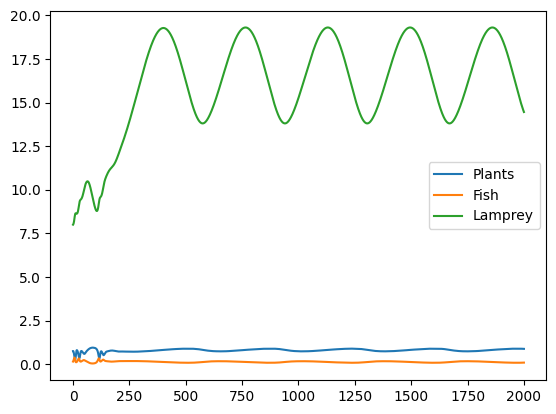

In [35]:
sol = solve_ivp(fun=lambda t,y: FC(t,y,par),t_span=t_span,y0=y0,t_eval=np.linspace(0,2000,20000))

labels = ['Plants','Fish','Lamprey']
for i in range(0,3):
    plt.plot(np.linspace(0,2000,20000),sol.y[i,:],label = labels[i])
plt.legend()

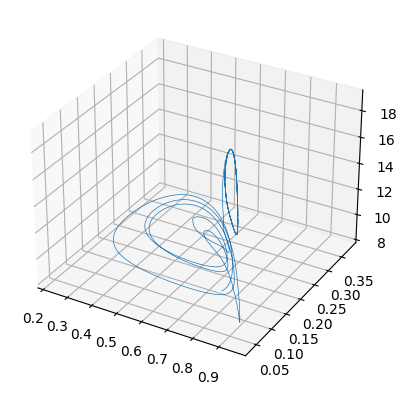

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:],linewidth=0.5)

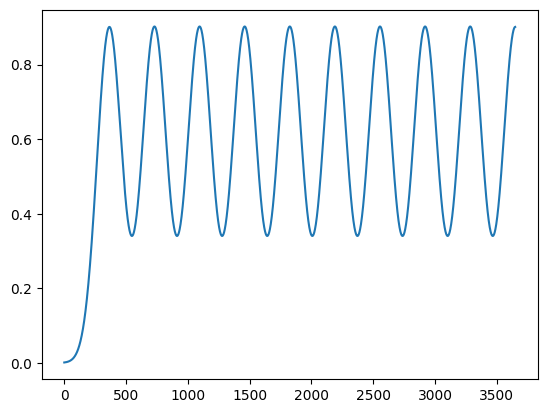

In [37]:
'''Three species model of a food chain'''
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


def fisheries(t):
    max_size = 0.9
    sigma = 10000
    return max_size * np.exp(-1/2 * ((t-365)**2)/sigma) + max_size * np.exp(-1/2 * ((t-730)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1095)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-1460)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1825)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2190)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-2555)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2920)**2)/sigma) + max_size * np.exp(-1/2 * ((t-3285)**2)/sigma) + \
max_size * np.exp(-1/2 * ((t-3650)**2)/sigma)

plt.plot([fisheries(t) for t in range(3650)])
plt.show()

y0 = [0.75,0.15,4,4,4]
t_span = [0,300]

par = {"a1":5,"b1":3,"a2":0.1,"b2":2,"d1":0.4,"d2":0.01,"d3":0.1,'F':fisheries,'gamma':0.5,'alpha':0.1}

def FC(t,y,par):
    X,Y,Z_1,Z_2,Z_H = y

    Z = Z_1 + Z_2

    dX = X * (1-X) - ((par['a1']*X)/(1+par['b1']*X))*Y

    dY = ((par['a1']*X)/(1+par['b1']*X)) * Y -par['d1']*Y - ((par['a2']*Y)/(1+par['b2']*Y))*Z + par['F'](t)

    #dZ_1 = (1-par['gamma']) * ((par['a2']*Y)/(1+par['b2']*Y))*Z - par['d2']* Z_1

    dZ_1 = 0.001 * (1-par['gamma']) * Z_H - par['d2']* Z_1

    #dZ_2 = (par['gamma']) * ((par['a2']*Y)/(1+par['b2']*Y))*Z - par['d2']* Z_2

    dZ_2 = 0.001 * (par['gamma']) * Z_H - par['d2']* Z_2

    dZ_H = par['alpha'] * Z_1 * Z_2 - par['d3'] * Z_H



    return np.array([dX,dY,dZ_1,dZ_2,dZ_H])

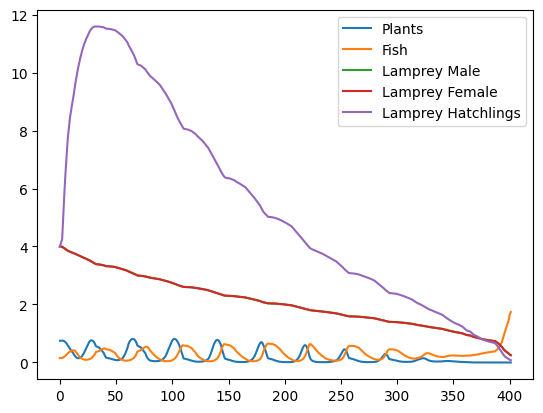

In [38]:
sol = solve_ivp(fun=lambda t,y: FC(t,y,par),t_span=t_span,y0=y0,method="LSODA")

labels = ['Plants','Fish','Lamprey Male','Lamprey Female','Lamprey Hatchlings']
for i in range(0,5):
    plt.plot(sol.y[i,:],label = labels[i])
plt.legend()

In [39]:
y0 = [0.75,0.15,4,4,4]
t_span = [0,3650]

par = {"a1":5,"b1":3,"a2":0.1,"b2":2,"d1":0.4,"d2":0.01,"d3":0.1,'F':fisheries,'gamma':0.5,'alpha':0.1}

def FC(t,y,par):
    X,Y,Z_1,Z_2,Z_H = y

    Z = Z_1 + Z_2

    dX = X * (1-X) - ((par['a1']*X)/(1+par['b1']*X))*Y

    dY = ((par['a1']*X)/(1+par['b1']*X)) * Y -par['d1']*Y - ((par['a2']*Y)/(1+par['b2']*Y))*Z + par['F'](t)

    dZ_1 = 0.001 * (1-par['gamma']) * Z_H - par['d2']* Z_1

    dZ_2 = 0.001 * (par['gamma']) * Z_H - par['d2']* Z_2

    dZ_H = par['alpha'] * Z_1 * Z_2 - par['d3'] * Z_H



    return np.array([dX,dY,dZ_1,dZ_2,dZ_H])

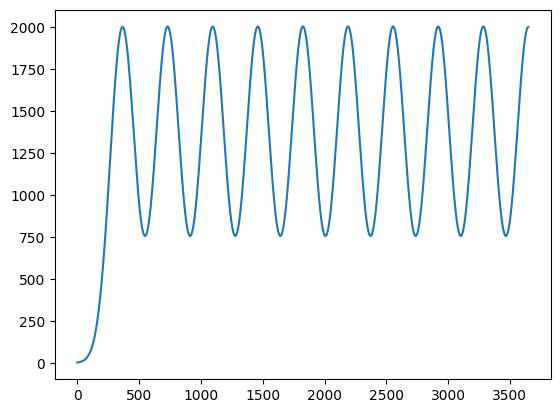

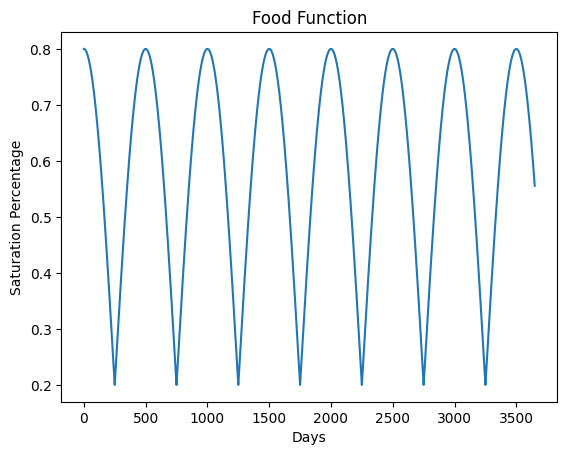

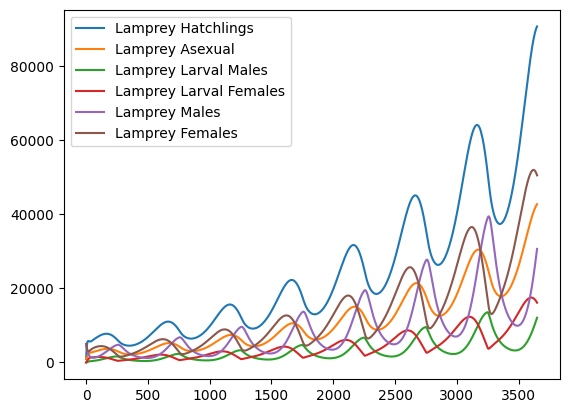

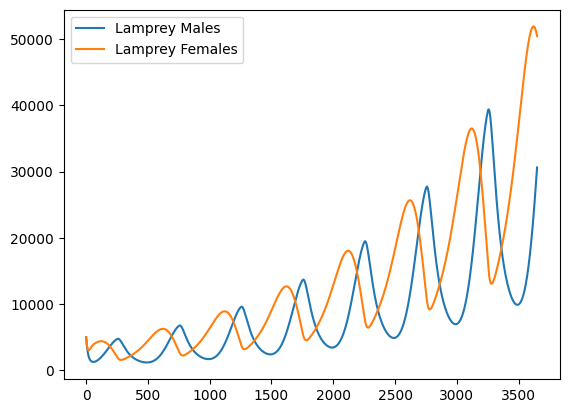

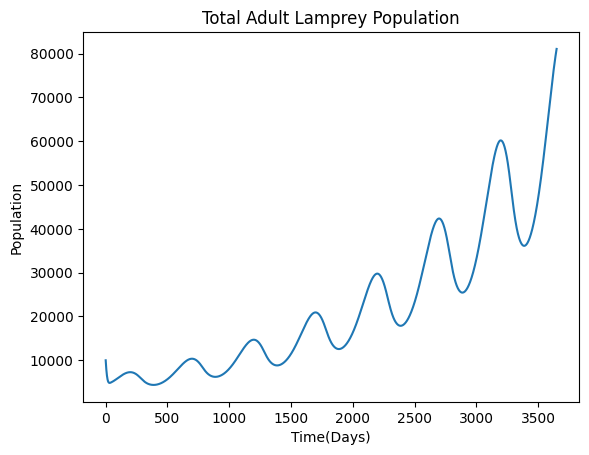

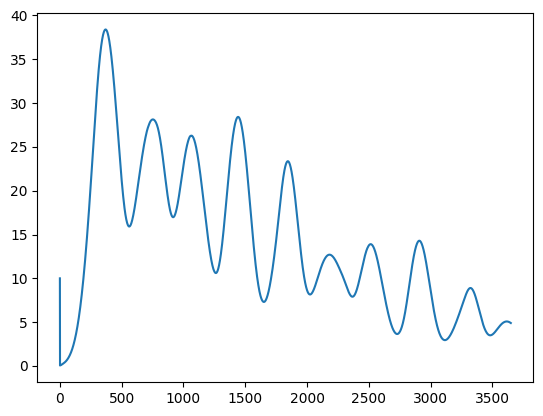

In [40]:
'''Three species model of a food chain'''
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

def food(t):
    return 0.6 * np.abs(np.cos((2*np.pi * t)/1000)) + 0.2
    #return 0.5

def fisheries(t):
    max_size = 2_000
    sigma = 10000
    return max_size * np.exp(-1/2 * ((t-365)**2)/sigma) + max_size * np.exp(-1/2 * ((t-730)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1095)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-1460)**2)/sigma) + max_size * np.exp(-1/2 * ((t-1825)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2190)**2)/sigma)\
+ max_size * np.exp(-1/2 * ((t-2555)**2)/sigma) + max_size * np.exp(-1/2 * ((t-2920)**2)/sigma) + max_size * np.exp(-1/2 * ((t-3285)**2)/sigma) + \
max_size * np.exp(-1/2 * ((t-3650)**2)/sigma)

plt.plot([fisheries(t) for t in range(3650)])
plt.show()

plt.title("Food Function")
plt.xlabel("Days")
plt.ylabel("Saturation Percentage")
plt.plot([food(t) for t in range(3650)])
plt.show()

par = {
        'alpha_1':0.3,
       'alpha_2':0.7,
       'hatchling_growth':0.205,
       'larval_growth':0.15,
       'food_per_lamprey':0.1,
       'asexual_growth':0.05,
       'fish_growth_rate': 0.8,
       'lamprey_successful_kill':0.005,
       'mu_H':0.05,
       'mu_A':0.005,
       'mu_l':0.005,
       'mu_L': 0.05,
       'mu_F':0.1,
       'Food':food,
       'Fisheries':fisheries}

def Lamprey(t,y,par):
    L_H,L_A,L_lm,L_lf,L_m,L_f,F = y

    dL_H = par['hatchling_growth'] * (par['alpha_1'] * L_m + par['alpha_2'] * L_f) - par['asexual_growth'] * L_H -par['mu_H'] * L_H

    #dL_H = par['hatchling_growth'] *(L_m * L_f)/(L_m + L_f) - par['asexual_growth'] * L_H -par['mu_H'] * L_H

    dL_A = par['asexual_growth'] * L_H -par['mu_A'] * L_A - par['food_per_lamprey'] * (par['Food'](t) * L_A) - \
    par['food_per_lamprey'] * (1-par['Food'](t)) * L_A

    dL_lm = par['food_per_lamprey'] * (1-par['Food'](t)) * L_A - par['mu_l'] - par['larval_growth'] * L_lm 

    dL_lf = par['food_per_lamprey'] * par['Food'](t) * L_A - par['mu_l'] - par['larval_growth'] * L_lf

    dL_m = par['larval_growth'] * L_lm -par['mu_L'] * L_m

    dL_f = par['larval_growth'] * L_lf - par['mu_L'] * L_f

    dF = par['fish_growth_rate'] * F * (1-F) - par['lamprey_successful_kill'] * (L_m + L_f) * F + par['Fisheries'](t) - par['mu_F'] * F

    return np.array([dL_H,dL_A,dL_lm,dL_lf,dL_m,dL_f,dF])


y0 = [1000,1000,0,0,5_000,5_000,10] #Hatchlings, Asexual, Larval male, larval female, adult male, adult female
t_span = [0,3650]

sol = solve_ivp(fun=lambda t,y: Lamprey(t,y,par),t_span=t_span,y0=y0,method="LSODA",t_eval=np.linspace(0,t_span[1],t_span[1]))

labels = ['Lamprey Hatchlings','Lamprey Asexual', 'Lamprey Larval Males',
'Lamprey Larval Females','Lamprey Males','Lamprey Females']

for i in range(0,6):
    plt.plot(sol.y[i,:],label = labels[i])
plt.legend()
plt.show()

plt.plot(sol.y[4,:],label=labels[4])
plt.plot(sol.y[5,:],label = labels[5])
plt.legend()
plt.show()


plt.title("Total Adult Lamprey Population")
plt.xlabel("Time(Days)")
plt.ylabel("Population")
plt.plot(sol.y[4,:] + sol.y[5,:])
plt.show()

plt.plot(sol.y[6,:])



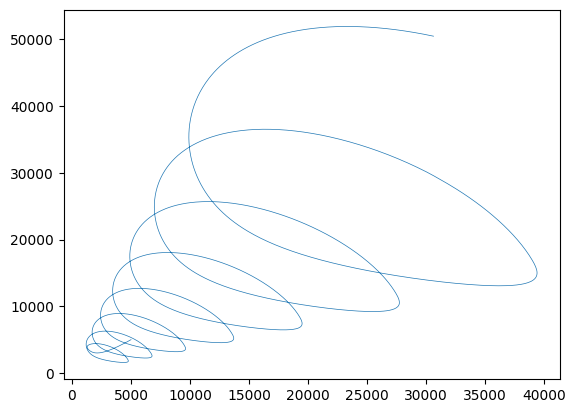

In [41]:

plt.plot(sol.y[4,:],sol.y[5,:],linewidth=0.5)



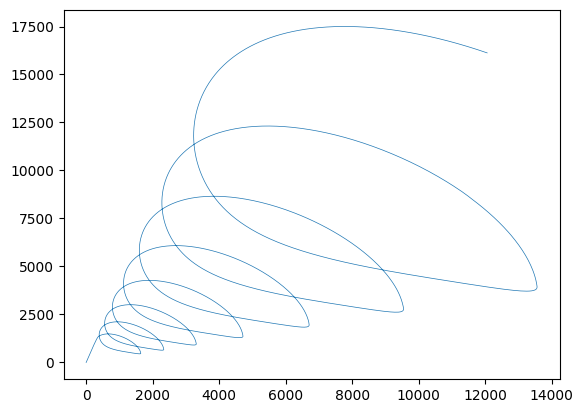

In [42]:
plt.plot(sol.y[2,:],sol.y[3,:],linewidth=0.5)



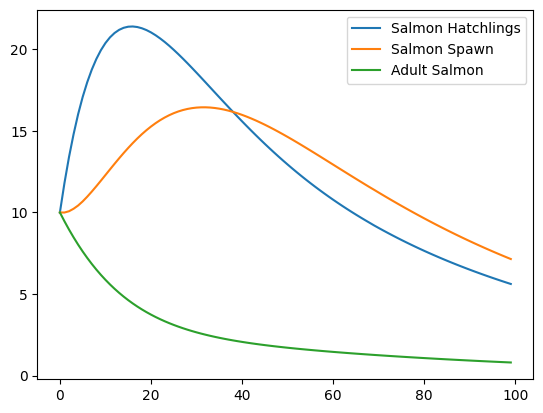

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


def lamprey(t):
    return 0.8


par = {'hatchling_growth':0.8,'spawn_growth':0.05,'spawn_death':0.05,'adult_growth':0.005,'adult_death':0.01,'fishing_rate':0.05,
    'lamprey':lamprey}

y0 = [10,10,10]

def Salmon(t,y,par):

    S_h,S_s,S = y

    dS_h = par['hatchling_growth'] * S * par['lamprey'](t) - par['spawn_growth'] * S_h
    dS_s = par['spawn_growth'] * S_h - par['spawn_death'] * S_s - par['adult_growth'] * S_s
    dS = par['adult_growth'] * S_s - par['adult_death'] * S -par['fishing_rate'] * S

    return np.array([dS_h,dS_s,dS])

t_span = [0,100]

sol = solve_ivp(fun=lambda t,y: Salmon(t,y,par),t_span=t_span,y0=y0,method="LSODA",t_eval=np.linspace(0,t_span[1],t_span[1]))

labels = ['Salmon Hatchlings','Salmon Spawn','Adult Salmon']
for i in range(0,3):
    plt.plot(sol.y[i,:],label = labels[i])
plt.legend()
plt.show()